In [ ]:
# !pip install tabulate

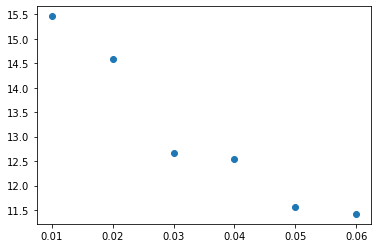

covar = -0.029370000000000004


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

np.set_printoptions(precision=3)


a = np.array([0.01,0.02,0.03,0.04,0.05,0.06])
b = np.array([15.46,14.59,12.66,12.55,11.57,11.42])

plt.scatter(a,b)
plt.show()

print("covar =", np.cov(a,b)[0][1])

In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression

x = a.copy().reshape(-1, 1)
y = b.copy()
model = LinearRegression()
model.fit(x,y)

r_sq = model.score(x,y)
print('coefficient of determination, R:', r_sq, np.sqrt(r_sq))

print('intercept:', model.intercept_)

print('slope:', model.coef_)

coefficient of determination, R: 0.9176486295238322 0.9579397838715292
intercept: 15.97866666666667
slope: [-83.914]


In [3]:
y_pred = model.predict(x)
print('predicted response:', y_pred, sep='\n')
print("std error of estimate = ", np.sqrt(np.sum((y - y_pred)**2)/(y.shape[0] - 2)))

predicted response:
[15.14  14.3   13.461 12.622 11.783 10.944]
std error of estimate =  0.5258018819361704


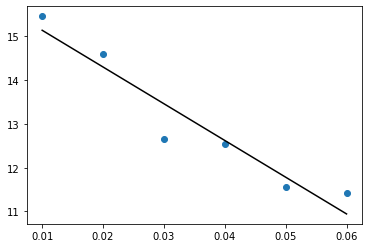

In [4]:
plt.scatter(a,b)
plt.plot(x, model.predict(x),color='k')
plt.show()

In [5]:
import pandas as pd
data = {'X':a, 
        'Y':b,
        'X2':a**2,
        'xy': a*b,
        'y_mean': np.mean(np.array(b)),
        'y_fit': y_pred,
        '(y-y_mean)^2':(y - np.mean(np.array(b)))**2,
        '(y-y_pred)^2':(y - y_pred)**2}

df = pd.DataFrame(data)
df.loc['total'] = df.sum()
df

,X,Y,X2,xy,y_mean,y_fit,(y-y_mean)^2,(y-y_pred)^2
0,0.01,15.46,0.0001,0.1546,13.041667,15.139524,5.848336,0.102705
1,0.02,14.59,0.0004,0.2918,13.041667,14.300381,2.397336,0.083879
2,0.03,12.66,0.0009,0.3798,13.041667,13.461238,0.145669,0.641982
3,0.04,12.55,0.0016,0.5020,13.041667,12.622095,0.241736,0.005198
4,0.05,11.57,0.0025,0.5785,13.041667,11.782952,2.165803,0.045349
5,0.06,11.42,0.0036,0.6852,13.041667,10.943810,2.629803,0.226757
total,0.21,78.25,0.0091,2.5919,78.250000,78.250000,13.428683,1.105870


## Newton Raphson Method

In [5]:
import numpy as np
from tabulate import tabulate

In [18]:
##################################
y0 = 200 
x0 = 60  
##################################

ly = []
lx = []
lf1 = []
lf2 = []
ldf1_x = []
ldf1_y = []
ldf2_x = []
ldf2_y = []
ldel_x = []
ldel_y = []
l_error = []

x_init = np.array((x0, y0))
error  = np.inf

while error > 1e-4:

    x = x_init[0]
    y = x_init[1]

#####################################
    f1 = y - 18 - 11*x + 0.12*x*x
    f2 = y - 0.7*x - 185
    df1_y  = 1
    df1_x = -11 + 0.24*x
    df2_y  = 1
    df2_x = -0.7
#####################################

    J = np.array([[df1_x, df1_y], [df2_x, df2_y]])

    F = np.array([-1*f1, -1*f2])

    x_new = np.matmul(np.linalg.inv(J), F) + x_init
    del_xy = x_new - x_init
    error = np.linalg.norm(del_xy/x_init)**2
    print(x_new, error)

    ly.append(y)
    lx.append(x)
    lf1.append(f1)
    lf2.append(f2)
    ldf1_x.append(df1_x)
    ldf1_y.append(df1_y)
    ldf2_x.append(df2_x)
    ldf2_y.append(df2_y)
    ldel_x.append(del_xy[0])
    ldel_y.append(del_xy[1])
    l_error.append(error)

    x_init = x_new

print(x_init)

[ 64.63414634 230.24390244] 0.028832705400224787
[ 64.13972174 229.89780522] 6.077573792461186e-05
[ 64.13972174 229.89780522]


In [22]:
from tabulate import tabulate
headers = ['y', 'x', 'f1', 'f2', 'df1_y','df1_x','df2_y','df2_x', 'dely', 'delx', 'error']


SNo = range(1, len(ly)+1)

table = zip(SNo, ly, lx, lf1, lf2, ldf1_x, ldf1_y, ldf2_x, ldf2_y, ldel_x, ldel_y, l_error)
print(tabulate(table, headers=headers, floatfmt=".7f"))
print('Final values = ', x_init)

              y           x           f1           f2      df1_y    df1_x       df2_y    df2_x        dely        delx      error
--  -----------  ----------  -----------  -----------  ---------  -------  ----------  -------  ----------  ----------  ---------
 1  200.0000000  60.0000000  -46.0000000  -27.0000000  3.4000000        1  -0.7000000        1   4.6341463  30.2439024  0.0288327
 2  230.2439024  64.6341463    2.5770375    0.0000000  4.5121951        1  -0.7000000        1  -0.4944246  -0.3460972  0.0000608
Final values =  [ 64.13972174 229.89780522]
